# Harris Corner Detection - From scratch using Python 

Steps:

- Compute gradients along X and Y
- Calculate the moment of inertia along an elliptical curve fitting
- Then get $E_{max} = \lambda_1$ and $E_{min} = \lambda_2$ by solving for the equations using SVD or EVD.
- Then calulate the response function R using $R = \lambda_1\lambda_2 - k(\lambda_1 + \lambda_2)^2$ and k empirically found between 0.4 to 0.6
- Using Non Max Supression - which we will not be using here as we are only computing for one patch.
    1. Slide a window of size k over the image
    2. At each position, if the pixel at the center is that maximum value within the window, label it as positive (retain it). Else label it as negative (supress it).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from scipy.ndimage import sobel, gaussian_filter, convolve
from scipy import signal
import skimage.io as io
import cv2

array([[255, 245, 255,   0,   4],
       [231, 240, 255,   0,  13],
       [255, 255, 239,   8,   0],
       [  0,  11,  14,   0,   4],
       [ 24,  18,   0,   6,   7]], dtype=uint8)

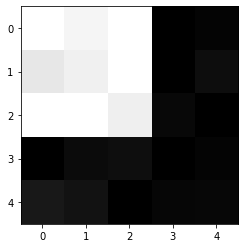

In [2]:
#If we use Harris corner detector in a color image, 
#the first step is to convert it into a grayscale image, which will enhance the processing speed.
# Load image:
input_pixels = imread('corner.jpg')
# io.imsave('testl.jpg', input_pixels)
plt.imshow(input_pixels, cmap='gray')
input_pixels = cv2.cvtColor(input_pixels, cv2.COLOR_RGB2GRAY)
input_pixels

In [3]:
input_pixels.shape

(5, 5)

In [4]:
def plotIxIy(Ix, Iy):
    plt.subplot(121)
    plt.title("Ix")
    plt.imshow(Ix, cmap="gray")
    plt.subplot(122)
    plt.title("Iy")
    plt.imshow(Iy, cmap="gray")  

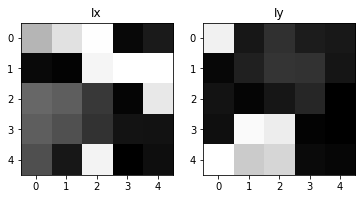

In [5]:
Ix = sobel(input_pixels, axis=0)
Iy = sobel(input_pixels, axis=1)
plotIxIy(Ix, Iy)

In [6]:
Ixx = Ix**2
Iyy = Iy**2
Ixy = Ix*Iy
GAUSS = np.array((
    [1/16, 2/16, 1/16],
    [2/16, 4/16, 2/16],
    [1/16, 2/16, 1/16]), dtype="float64")
Ixx = convolve(Ixx, GAUSS)
Iyy = convolve(Iyy, GAUSS)
Ixy = convolve(Ixy, GAUSS)
M = [[Ixx , Ixy],[Ixy, Iyy]] #moment matrix

In [7]:
# Sensitivity factor to separate corners from edges, typically in range `[0, 0.2]`. 
# Small values of k result in detection of sharp corners.
k = 0.04

# determinant
det = Ixx * Iyy - (Ixy ** 2)
# trace
trace = Ixx + Iyy

response = det - (k * trace ** 2)

print(response)

[[193.52  27.72 218.36  32.36 177.68]
 [ 73.92 222.44  58.88 153.4   52.16]
 [ 93.64 235.68 250.36 220.44  47.52]
 [104.44 216.2    0.92 233.36 143.72]
 [198.56  77.24 106.4  156.24  64.16]]


In [8]:
np.unravel_index(response.argmax(), response.shape) # we take the point with the maximum response

(2, 2)

In [9]:
response

array([[193.52,  27.72, 218.36,  32.36, 177.68],
       [ 73.92, 222.44,  58.88, 153.4 ,  52.16],
       [ 93.64, 235.68, 250.36, 220.44,  47.52],
       [104.44, 216.2 ,   0.92, 233.36, 143.72],
       [198.56,  77.24, 106.4 , 156.24,  64.16]])

In [10]:
response == 0

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

In [11]:
coords = np.unravel_index(np.argmax(response, axis=None), response.shape) #is used to find the index of maximum response

In [12]:
coords

(2, 2)

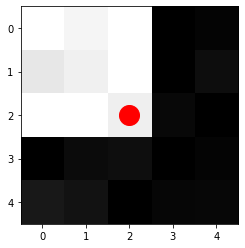

In [13]:
fig, ax = plt.subplots()
ax.imshow(input_pixels, cmap=plt.cm.gray)
ax.plot(coords[0], coords[1], color='red', marker='o',
        linestyle='None', markersize=20)
plt.show()

###### The output for the harris corner detection can be found in the mlx and respective pdf files